<a href="https://colab.research.google.com/github/sohyun-alicia/deeplearning-tensorflow/blob/main/ch5_ConvolustionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# fashin_mnist 데이터셋 내려받기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


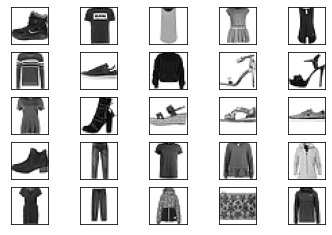

In [3]:
# 분류에 사용될 클래스 정의
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()        # 이미지 25개를 시각적으로 표현

In [4]:
# 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)           # 훈련 데이터셋을 이용하여 모델 훈련
model.evaluate(x_test, y_test, verbose=2)       # 검증 데이터셋을 이요하여 모델 평가

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5341 - accuracy: 0.8101
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4018 - accuracy: 0.8543
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3660 - accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3456 - accuracy: 0.8738
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3307 - accuracy: 0.8777
313/313 - 0s - loss: 0.3566 - accuracy: 0.8707


[0.35664987564086914, 0.8707000017166138]

이미지 데이터를 255로 나누는 이유

In [5]:
# 라이브러리 호출

import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [6]:
# 이미지 정보를 보여 주는 함수

def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

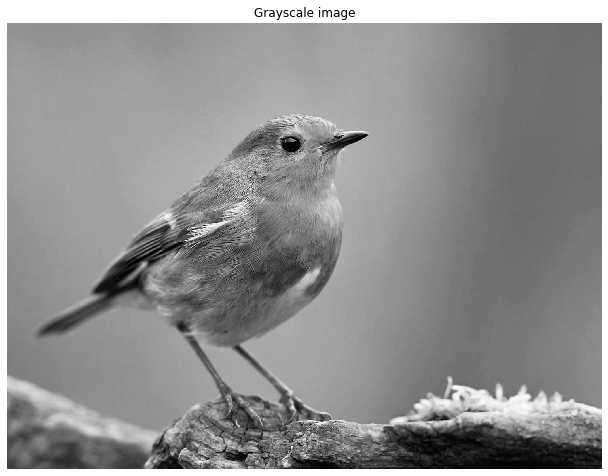

In [8]:
# 이미지 호출

image_gs = imread('bird.jpg', as_gray=True) 
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [9]:
# 이미지 정보 표현

print_image_summary(image_gs, ['G'])

--------------
Image Details:
--------------
Image dimensions: (1128, 1504)
Channels:
G : min=0.0000, max=0.9975


In [10]:
# 데이터 전처리

X_train_final = x_train.reshape((-1,28,28,1)) / 255.
X_test_final = x_test.reshape((-1,28,28,1)) / 255.

In [12]:
# 합성곱 네트워크를 이용한 모델 생성

model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)),  
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [13]:
# 모델 훈련 및 성능 평가

model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.7782 - accuracy: 0.7106
Epoch 2/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.4984 - accuracy: 0.8181
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.4302 - accuracy: 0.8430
Epoch 4/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3910 - accuracy: 0.8582
Epoch 5/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3640 - accuracy: 0.8680
313/313 - 3s - loss: 0.3818 - accuracy: 0.8622


[0.38175591826438904, 0.8622000217437744]

**전이 학습(transfer learning)**

In [15]:
# 특성 추출 기법
# ImageNet 데이터셋으로 사전 훈련된 모델을 가져온 후 마지막에 완전연결층 부분만 새로 만듭니다. 
# 즉, 학습할 때는 마지막 완전연결층(이미지의 카테고리를 결정하는 부분)만 학습하고 나머지 계층들은 학습되지 않도록 합니다

# 라이브러리 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# 사전 훈련된 모델 내려받기
model = ResNet50(include_top=True,      # 네트워크 상단에 완전연결층을 포함할지 여부
                 weights="imagenet",    # 가중치를 의미. None(무작위 초기화)과 ‘imagenet(ImageNet에서 사전 훈련된 값)’지정 가능
                 input_tensor=None,     # 입력 데이터의 텐서(layers.Input()의 출력)
                 input_shape=None,      # 입력 이미지에 대한 텐서 크기
                 pooling=None,          # None: 마지막 합성곱층이 출력 / avg: 마지막 합성곱층에 글로벌 평균 풀링이 추가 /max: 마지막 합성곱층에 글로벌 최대 풀링이 추가
                 classes=1000)          # weights로 'imagenet'을 사용하려면 classes 값이 1000이어야 함. 다른 값으로 사용하고 싶다면 'None'으로 지정

# ResNet50은 계층 50개로 구성된 합성곱 신경망
# ImageNet 데이터베이스의 100만 개가 넘는 영상을 이용하여 훈련된 신경망으로 전이 학습에 사용되도록 사전 훈련된 모델을 제공
# 입력 제약이 매우 크고, 충분한 메모리(RAM)가 없으면 학습 속도가 느릴 수 있는 단점

102973440/102967424 [==============================] - 1s 0us/step


In [17]:
# Resnet50 네트워크 구조 확인
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [18]:
# ResNet50 네트워크에 밀집층 추가

model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [19]:
# 훈련에 사용될 환경 설정
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epoch, iterations, batch size

데이터가 클 경우 한번에 학습하지 못해 데이터를 나눠서 학습하게 될 때 등장한다. 

사전적의미는
epoch 시대 , iteration 반복, batch 집단.
이지만,,,,,

머신러닝에서는
epoch 은 전체 데이터가 알고리즘에 한번 다 통과하는것을 의미한다. epoch 의 수가 증가할수록 모델의 정확도가 높아진다. 
어느 순간을 지나게 되면 모델이 훈련데이터에 너무 맞춰져서 훈련할 때는 성능이 좋지만 실제 데이터를 적용할 때는 성능이 좋지 않게 되는 overfitting이 발생한다. 마치 같은 문제집을 반복해서 풀면 답을 외워버리는 현상과 비슷하다. 
batch는 하나의 큰 데이터를 작은 데이터 셋으로 나누었을때의 크기를 의미한다. 마치 문제집에서 소단원들로 문제들이 묶여있는것과
비슷하다.
2000개의 데이터가 있을 때 
batch size를 500로 하면 4번이 iteration 되어야 1epoch 가 훈련된다.


In [35]:
# 모델 훈련
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "chap5/data/catanddog/train"
valid_dir = "chap5/data/catanddog/validation"

train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range = 0.1,
    shear_range=0.1,
    zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator,
                    verbose=2)

Found 385 images belonging to 3 classes.
Found 98 images belonging to 3 classes.
Epoch 1/10


InvalidArgumentError: ignored